In [96]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.


In [3]:
df = pd.read_csv("adult.data.csv")   
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [20]:
values = list(race_count)
values

[27816, 3124, 1039, 311, 271]

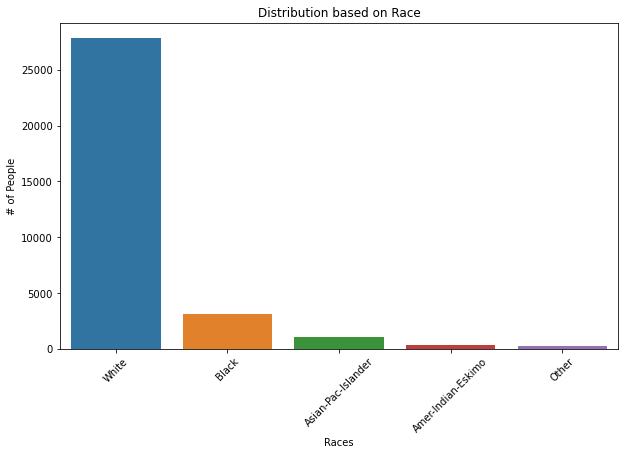

In [39]:
plt.figure(figsize=(10,6))
chart = sns.countplot(data=df, x="race")
plt.title("Distribution based on Race")
plt.xlabel('Races')
plt.ylabel("# of People")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

## What is the average age of men?

In [4]:
age_men = df.loc[df['sex'] == 'Male']['age'].mean()
average_age_men = round(age_men, 1)
average_age_men

39.4

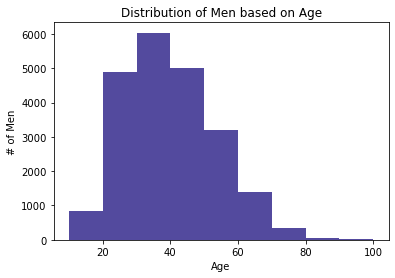

In [51]:
age_men = df.loc[df['sex'] == 'Male']['age']
min_age_of_men = df.loc[df['sex'] == 'Male']['age'].min()
min_age_of_men #17
max_age_of_men = df.loc[df['sex'] == 'Male']['age'].max()
max_age_of_men #90

bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(age_men, bins=bins, color='#534a9e')
plt.title("Distribution of Men based on Age")
plt.xlabel("Age")
plt.ylabel("# of Men")
plt.show()

## What is the percentage of people who have a Bachelor's degree?

In [53]:
bachelors_count = df.loc[df['education'] == 'Bachelors'].count()[0]
total_count = df.count()[0]
percentage_bachelors = round(bachelors_count/total_count * 100,1)

16.4

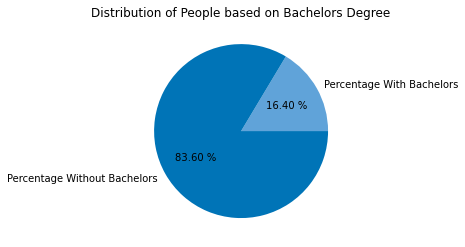

In [68]:
percentage_without_bachelors = 100 - percentage_bachelors

labels = ['Percentage With Bachelors', 'Percentage Without Bachelors']
colors = ['#60A3D9','#0074B7']

plt.pie([percentage_bachelors,percentage_without_bachelors], labels = labels, colors=colors, autopct = '%.2f %%')

plt.title("Distribution of People based on Bachelors Degree")
plt.show()

## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [5]:
#with (Bachelors, Masters, or Doctorate)
higher_education = df.loc[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')].count()[0]

# advanced education with salary >50K
adv_edu_rich = df.loc[(df['salary']=='>50K') & ((df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate'))].count()[0]

#percentage of people with advanced education and salary > 50K
higher_education_rich = round(adv_edu_rich/higher_education * 100, 1)  #(46.5)
higher_education_rich

46.5

## What percentage of people without advanced education make more than 50K?

In [6]:
#without (Bachelors, Masters, or Doctorate)
lower_education = df.loc[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate')].count()[0]

#without adv education but salary > 50K
low_edu_rich = df.loc[(df['salary']=='>50K') & ((df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate'))].count()[0]

#percentage without adv education but salary > 50K
lower_education_rich = round(low_edu_rich/lower_education * 100, 1)
lower_education_rich

17.4

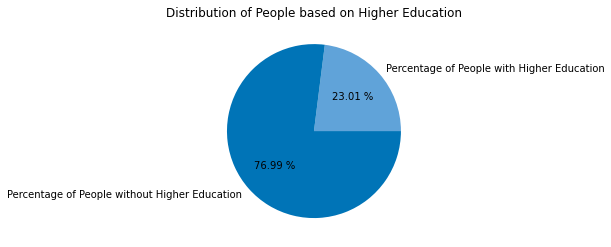

In [69]:
labels = ['Percentage of People with Higher Education', 'Percentage of People without Higher Education']
colors = ['#60A3D9','#0074B7']

plt.pie([higher_education,lower_education], labels = labels, colors=colors, autopct = '%.2f %%')

plt.title("Distribution of People based on Higher Education")
plt.show()

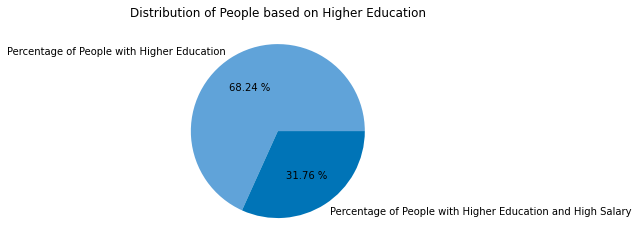

In [71]:
labels = ['Percentage of People with Higher Education','Percentage of People with Higher Education and High Salary']
colors = ['#60A3D9','#0074B7']

plt.pie([higher_education,adv_edu_rich], labels = labels, colors=colors, autopct = '%.2f %%')

plt.title("Distribution of People based on Higher Education vs Higher Salary")
plt.show()

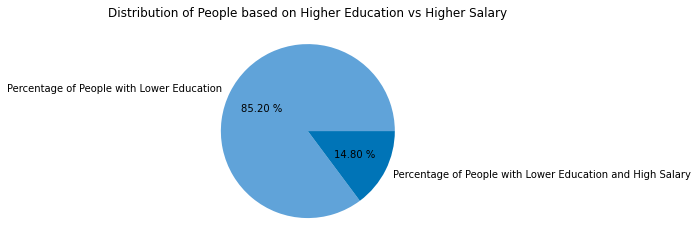

In [75]:
labels = ['Percentage of People with Lower Education','Percentage of People with Lower Education and High Salary']
colors = ['#60A3D9','#0074B7']

plt.pie([lower_education,low_edu_rich], labels = labels, colors=colors, autopct = '%.2f %%')

plt.title("Distribution of People based on Basic Education vs Higher Salary")
plt.show()

## What is the minimum number of hours a person works per week (hours-per-week feature)?

In [7]:
min_work_hours = df['hours-per-week'].min()
min_work_hours

1

In [78]:
max_work_hours = df['hours-per-week'].max()
max_work_hours
work_hours = df['hours-per-week']

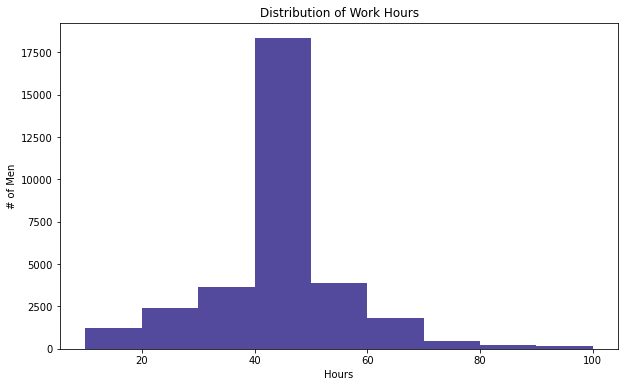

In [81]:
bins = [10,20,30,40,50,60,70,80,90,100]

plt.figure(figsize = (10,6))
plt.hist(work_hours, bins=bins, color='#534a9e')
plt.title("Distribution of Work Hours")
plt.xlabel("Hours")
plt.ylabel("# of Men")
plt.show()

## What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [8]:
#workers with minimum work hours i.e 1hr
num_min_workers = df[df['hours-per-week'] == min_work_hours] #will make a df with min work hours = 1

#workers who work for min hours with salary > 50K
num_min_workers_rich = num_min_workers[num_min_workers['salary'] == '>50K'].count()[0]

#percentage of workers who work for min hours with salary > 50K
rich_percentage = round(num_min_workers_rich/len(num_min_workers)*100, 1)
rich_percentage

10.0

## What country has the highest percentage of people that earn >50K?

In [9]:
#1. Find number of people in every country
no_of_people_in_countries = df['native-country'].value_counts()
  
#2. Find number of people with salary > 50K in every country
people_with_high_sal_in_countries = df[df['salary'] == '>50K']['native-country'].value_counts()

#3. Find % of people with salary > 50K in every country
countries_rich_people_percent = round(people_with_high_sal_in_countries/no_of_people_in_countries*100,1)

#4. Find the highest earning country  ('Iran')
highest_earning_country = countries_rich_people_percent.idxmax()
#highest_earning_country
  
#5. Highest percentage of people that earn >50K  (41.86)
highest_earning_country_percentage = round(countries_rich_people_percent.max(), 1)
highest_earning_country_percentage

41.9

## Identify the most popular occupation for those who earn >50K in India.

In [10]:
#1. Find number of people in India & of people with salary > 50K in India
rich_people_india = df[(df['native-country']=='India') & (df['salary'] == '>50K')]
  
#2. Find the most popular occupation for these people
occupations_of_rich_people_india = rich_people_india['occupation'].value_counts()
#occupations_of_rich_people_india
  
top_IN_occupation = occupations_of_rich_people_india.idxmax()
top_IN_occupation

'Prof-specialty'

In [84]:
occupations_of_rich_people_india

Prof-specialty      25
Exec-managerial      8
Tech-support         2
Other-service        2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

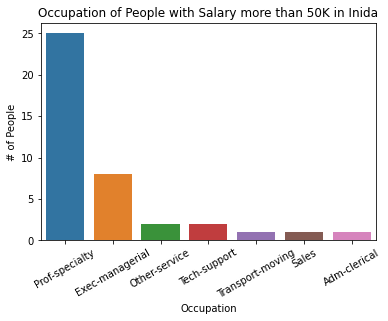

In [90]:
chart = sns.countplot(data=rich_people_india, x="occupation")

plt.title('Occupation of People with Salary more than 50K in Inida')
plt.xlabel('Occupation')
plt.ylabel('# of People')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
plt.show()